In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Make plots look a bit nicer
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True

DATA_PROCESSED = Path("../data/processed")

orders = pd.read_csv(DATA_PROCESSED / "orders_clean.csv")
customers = pd.read_csv(DATA_PROCESSED / "customers_clean.csv")
products = pd.read_csv(DATA_PROCESSED / "products_clean.csv")

print("Orders shape:", orders.shape)
print("Customers shape:", customers.shape)
print("Products shape:", products.shape)

orders.head()


Orders shape: (5000, 11)
Customers shape: (4844, 4)
Products shape: (3835, 4)


,order_id,order_date,customer_id,city,region,category,sub_category,sales,quantity,discount,profit
0,10001,2024-10-19,C2093,Bangalore,South,Books,Non-Fiction,68958.6,2,5,10525.09
1,10002,2025-08-30,C210,Delhi,North,Groceries,Rice,33732.0,1,20,6299.66
2,10003,2023-11-04,C3419,Patna,East,Kitchen,Juicer,207603.2,4,20,19850.27
3,10004,2025-05-23,C475,Kolkata,East,Groceries,Oil,158610.0,5,15,36311.02
4,10005,2025-01-19,C266,Pune,West,Clothing,Kids Wear,45033.3,1,10,9050.04


In [5]:
# Convert order_date to datetime if present
if "order_date" in orders.columns:
    orders["order_date"] = pd.to_datetime(orders["order_date"], errors="coerce")
else:
    raise ValueError("'order_date' column is missing from orders_clean.csv")

# Optionally handle ship_date if it exists
if "ship_date" in orders.columns:
    orders["ship_date"] = pd.to_datetime(orders["ship_date"], errors="coerce")

orders[["order_date"]].head()



,order_date
0,2024-10-19
1,2025-08-30
2,2023-11-04
3,2025-05-23
4,2025-01-19


In [6]:
total_revenue = orders["sales"].sum() if "sales" in orders.columns else None
total_profit = orders["profit"].sum() if "profit" in orders.columns else None
num_orders = orders["order_id"].nunique() if "order_id" in orders.columns else len(orders)
num_customers = orders["customer_id"].nunique() if "customer_id" in orders.columns else None

print("=== Basic KPIs ===")
if total_revenue is not None:
    print(f"Total revenue: {total_revenue:,.2f}")
if total_profit is not None:
    print(f"Total profit: {total_profit:,.2f}")
print(f"Number of orders: {num_orders}")
if num_customers is not None:
    print(f"Number of customers: {num_customers}")


=== Basic KPIs ===
Total revenue: 533,666,024.35
Total profit: 79,708,734.91
Number of orders: 5000
Number of customers: 4844


In [7]:
orders["order_month"] = orders["order_date"].dt.to_period("M").dt.to_timestamp()

monthly = (
    orders
    .groupby("order_month")
    .agg(
        revenue=("sales", "sum"),
        profit=("profit", "sum")
    )
    .reset_index()
)

monthly.head()


,order_month,revenue,profit
0,2023-10-01,21307522.20,3106231.10
1,2023-11-01,22040269.20,3387740.08
2,2023-12-01,20624240.25,2989330.92
3,2024-01-01,21477241.40,3104253.86
4,2024-02-01,19853396.50,2941448.82


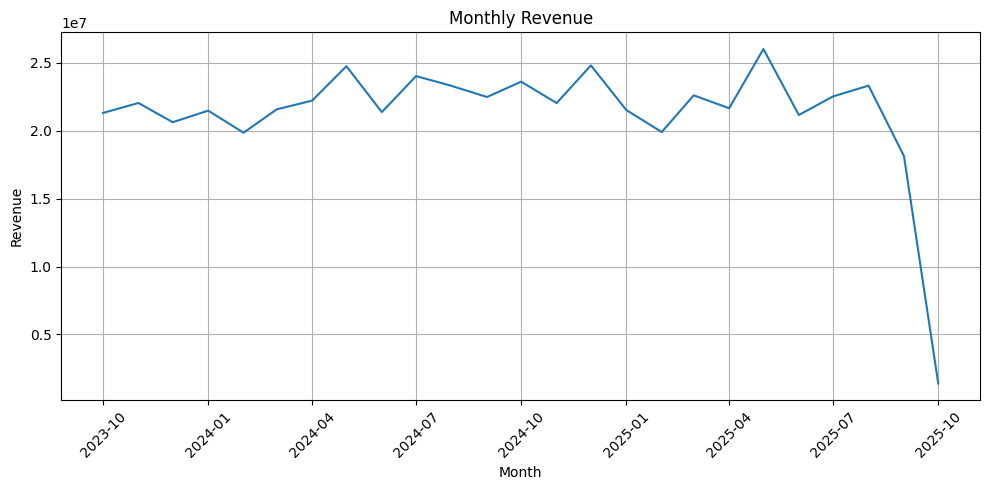

In [8]:
sns.lineplot(data=monthly, x="order_month", y="revenue")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


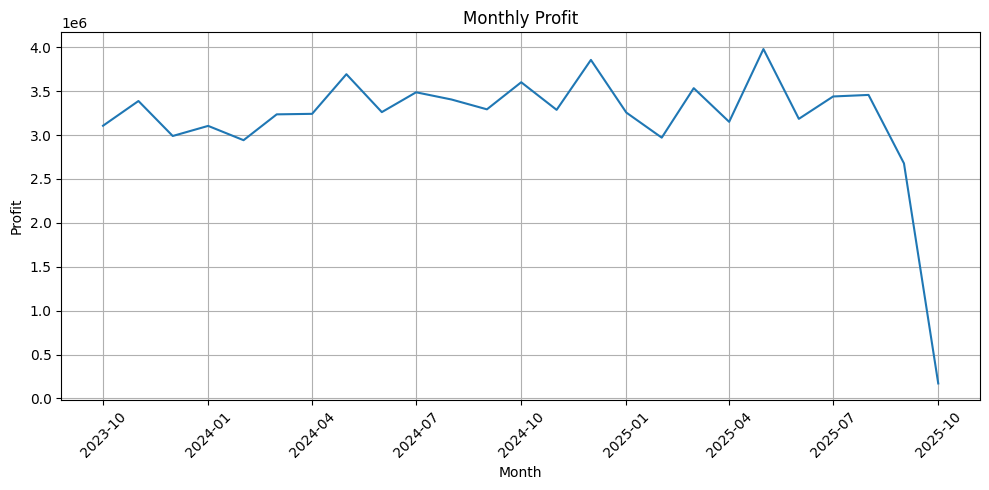

In [9]:
sns.lineplot(data=monthly, x="order_month", y="profit")
plt.title("Monthly Profit")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


,region,revenue,profit
1,North,1.435782e+08,21343004.33
0,East,1.358116e+08,20532558.12
3,West,1.310460e+08,19580123.14
2,South,1.232302e+08,18253049.32


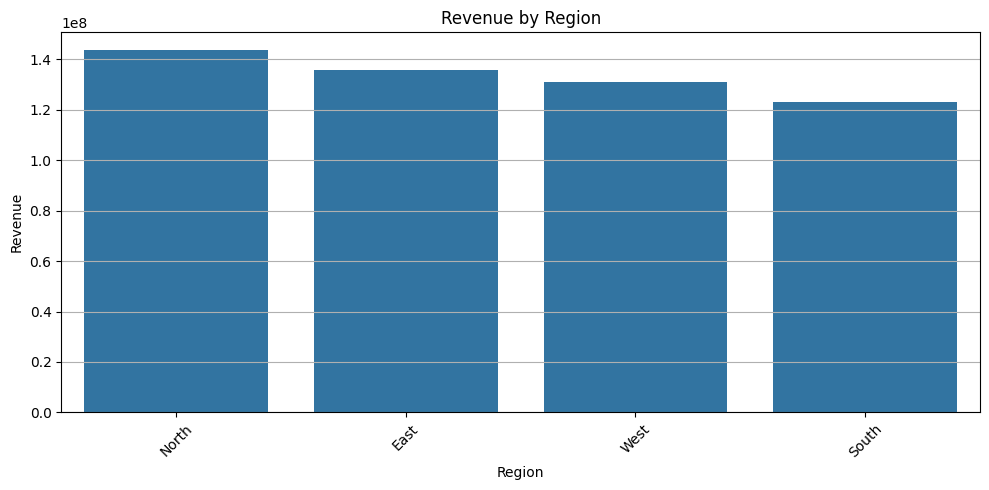

In [10]:
if "region" in orders.columns:
    region_rev = (
        orders
        .groupby("region")
        .agg(
            revenue=("sales", "sum"),
            profit=("profit", "sum")
        )
        .reset_index()
        .sort_values("revenue", ascending=False)
    )

    display(region_rev)

    sns.barplot(data=region_rev, x="region", y="revenue")
    plt.title("Revenue by Region")
    plt.xlabel("Region")
    plt.ylabel("Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'region' column in orders – skipping region analysis.")


In [11]:
if "country" in orders.columns:
    country_rev = (
        orders
        .groupby("country")
        .agg(
            revenue=("sales", "sum"),
            profit=("profit", "sum")
        )
        .reset_index()
        .sort_values("revenue", ascending=False)
    )

    display(country_rev.head(10))

    sns.barplot(data=country_rev.head(10), x="country", y="revenue")
    plt.title("Top 10 Countries by Revenue")
    plt.xlabel("Country")
    plt.ylabel("Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'country' column in orders – skipping country analysis.")


No 'country' column in orders – skipping country analysis.


,category,revenue,profit
6,Home Decor,57233222.35,8556846.94
4,Furniture,56647187.90,8693087.03
2,Clothing,55053908.30,8445750.29
1,Books,54932643.00,8076273.29
7,Kitchen,54227902.30,7879573.29
3,Electronics,52587883.95,8042133.88
9,Toys,52227366.45,7986871.44
8,Sports,52069397.25,7739430.04
0,Beauty,50803409.70,7213436.07
5,Groceries,47883103.15,7075332.64


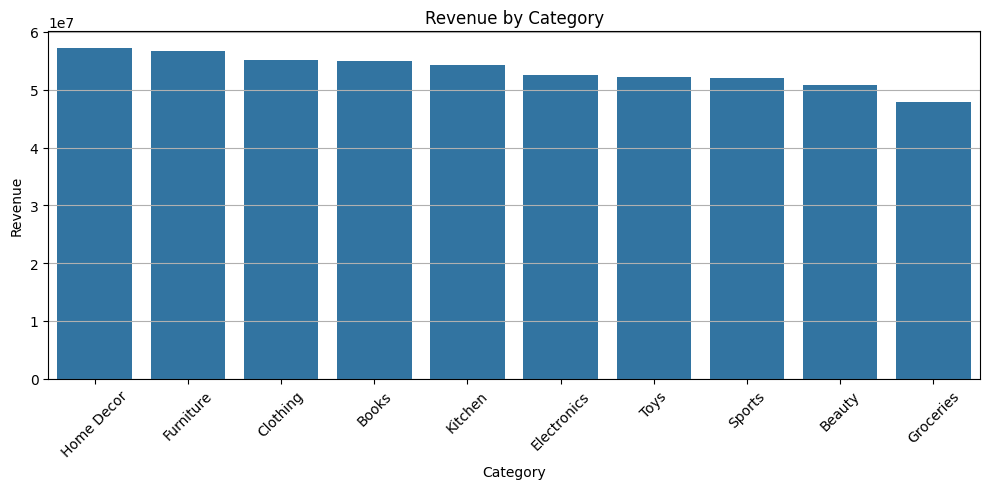

In [12]:
if "category" in orders.columns:
    cat_rev = (
        orders
        .groupby("category")
        .agg(
            revenue=("sales", "sum"),
            profit=("profit", "sum")
        )
        .reset_index()
        .sort_values("revenue", ascending=False)
    )

    display(cat_rev)

    sns.barplot(data=cat_rev, x="category", y="revenue")
    plt.title("Revenue by Category")
    plt.xlabel("Category")
    plt.ylabel("Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'category' column in orders – skipping category analysis.")


,sub_category,revenue,profit
39,Sofa,15185544.25,2304898.78
22,Lamp,14767580.20,2247216.13
43,Tennis Racket,12934015.25,1946587.50
48,Women's Wear,12646602.90,1846403.61
16,Fiction,12376112.80,1707577.00
29,Non-Fiction,12219033.75,1945175.03
2,Bed,12211588.60,1852587.47
20,Juicer,12194033.75,1743368.29
19,Headphones,12058508.60,1867457.80
17,Football,11779009.10,1681376.60


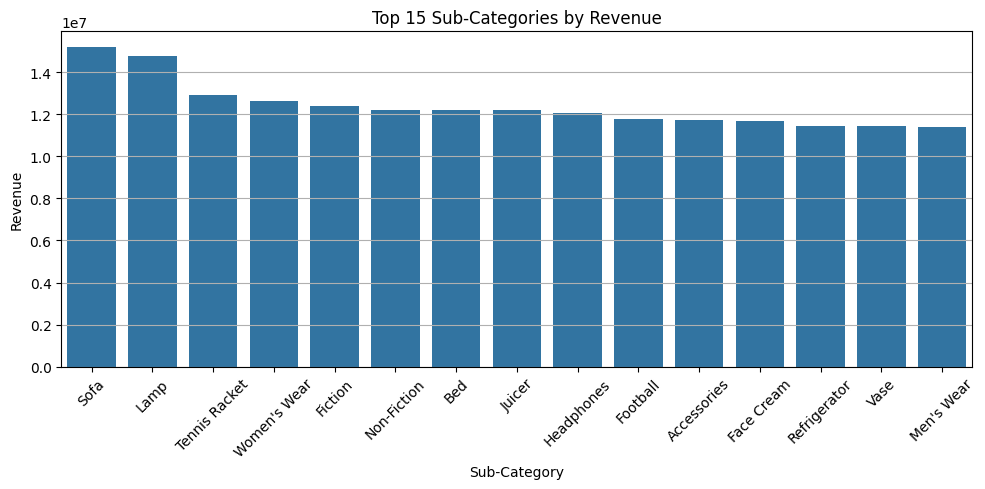

In [13]:
if "sub_category" in orders.columns:
    subcat_rev = (
        orders
        .groupby("sub_category")
        .agg(
            revenue=("sales", "sum"),
            profit=("profit", "sum")
        )
        .reset_index()
        .sort_values("revenue", ascending=False)
    )

    display(subcat_rev.head(15))

    sns.barplot(data=subcat_rev.head(15), x="sub_category", y="revenue")
    plt.title("Top 15 Sub-Categories by Revenue")
    plt.xlabel("Sub-Category")
    plt.ylabel("Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'sub_category' column in orders – skipping sub-category analysis.")


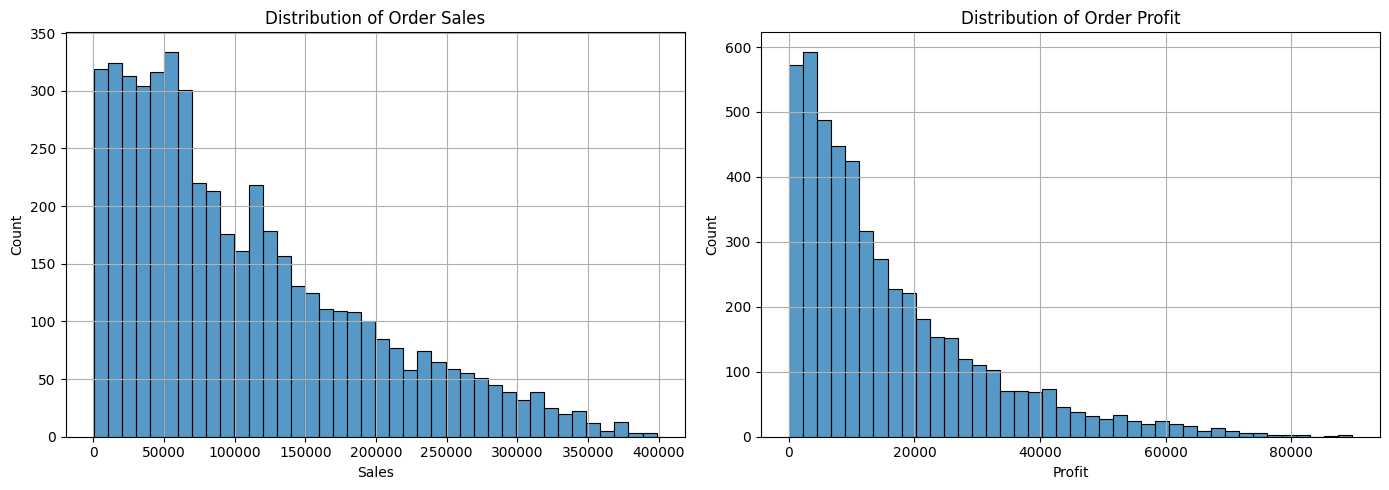

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(orders["sales"], bins=40, ax=axes[0])
axes[0].set_title("Distribution of Order Sales")
axes[0].set_xlabel("Sales")

sns.histplot(orders["profit"], bins=40, ax=axes[1])
axes[1].set_title("Distribution of Order Profit")
axes[1].set_xlabel("Profit")

plt.tight_layout()
plt.show()


In [15]:
if "segment" in orders.columns:
    seg_perf = (
        orders
        .groupby("segment")
        .agg(
            revenue=("sales", "sum"),
            profit=("profit", "sum"),
            num_orders=("order_id", "nunique")
        )
        .reset_index()
        .sort_values("revenue", ascending=False)
    )

    display(seg_perf)

    sns.barplot(data=seg_perf, x="segment", y="revenue")
    plt.title("Revenue by Customer Segment")
    plt.xlabel("Segment")
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.show()
else:
    print("No 'segment' column in orders – skipping segment analysis.")


No 'segment' column in orders – skipping segment analysis.


,category,revenue,profit,profit_margin_pct
4,Furniture,56647187.90,8693087.03,15.346017
2,Clothing,55053908.30,8445750.29,15.340873
3,Electronics,52587883.95,8042133.88,15.292750
9,Toys,52227366.45,7986871.44,15.292503
6,Home Decor,57233222.35,8556846.94,14.950839
8,Sports,52069397.25,7739430.04,14.863683
5,Groceries,47883103.15,7075332.64,14.776262
1,Books,54932643.00,8076273.29,14.702139
7,Kitchen,54227902.30,7879573.29,14.530478
0,Beauty,50803409.70,7213436.07,14.198724


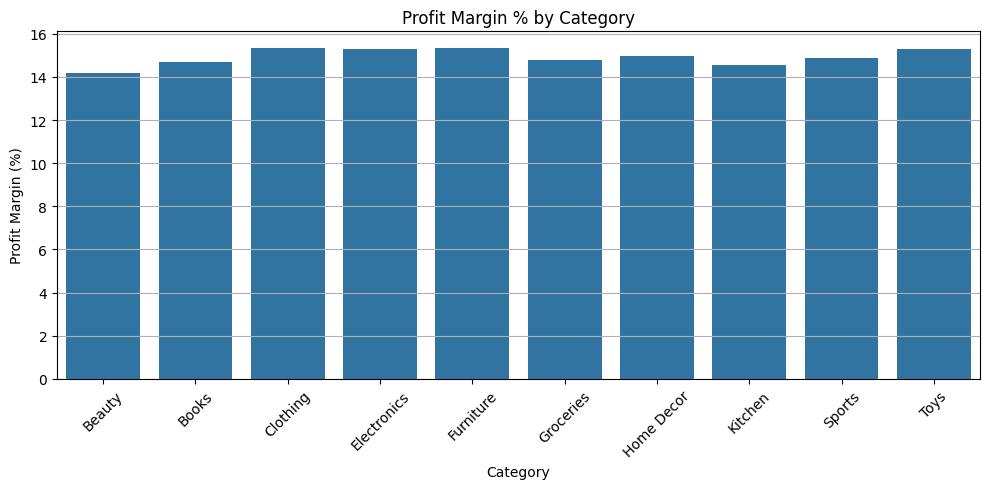

In [16]:
if {"category", "sales", "profit"}.issubset(orders.columns):
    cat_margin = (
        orders
        .groupby("category")
        .agg(
            revenue=("sales", "sum"),
            profit=("profit", "sum")
        )
        .reset_index()
    )
    cat_margin["profit_margin_pct"] = cat_margin["profit"] / cat_margin["revenue"] * 100

    display(cat_margin.sort_values("profit_margin_pct", ascending=False))

    sns.barplot(data=cat_margin, x="category", y="profit_margin_pct")
    plt.title("Profit Margin % by Category")
    plt.xlabel("Category")
    plt.ylabel("Profit Margin (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Missing 'category', 'sales', or 'profit' columns – cannot compute margins.")
